In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

%load_ext autoreload
%autoreload 2

In [2]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 100,
              'delay': 500}

## Parallel Simulation

In [6]:
#initializing params object
params = Params.from_dict(PARAMS_DICT)
#params = Params(ntrials=5)

#initializing simulation class
parsim = ParallelSimulation(params)

#simulation
stimulus = 500
K = 5.0
initI = 0.8
par_result = parsim.simulate(stimulus, K, initI)

Stimulus: 500 , Production of trial 10 (blue): 520


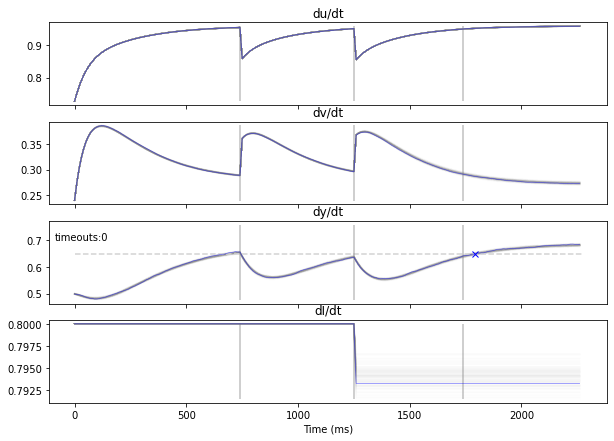

In [7]:
plot = SimulationPlot(par_result.create_simulation_plot_data())
alpha=0.01
plot.plot_trials(alpha)
plot.plot_example_trial(stimulus, 10)

In [49]:
#simulation
stimulus_range = [400,500,600,700,800]
K = 5.0
initI = 0.8
par_range_result = parsim.simulate_range(stimulus_range, K, initI)

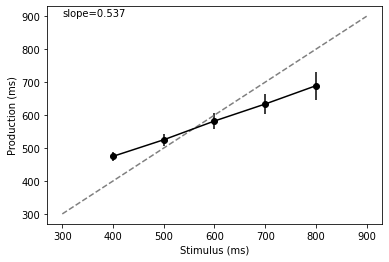

In [9]:
plot = BehavioralPlot(par_range_result.create_behavioral_plot_data())
plot.plot_behavior()

## Experiment Simulation

In [22]:
params = Params.from_dict({**PARAMS_DICT, 'ntrials': 5})
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
initI = 0.8
exp_result = expsim.simulate(stimulus_lst, K, initI)

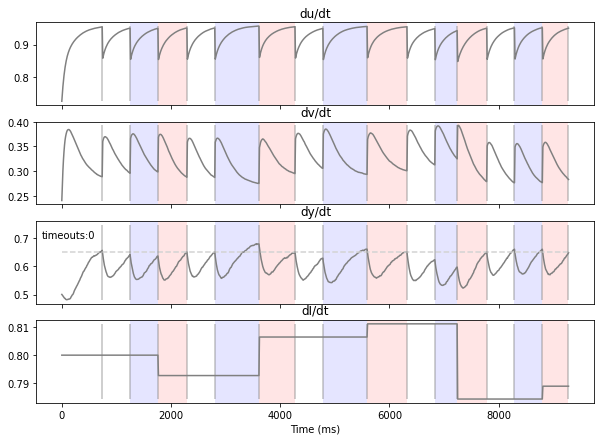

In [23]:
alpha = 1
plot = SimulationPlot(exp_result.create_simulation_plot_data())
#shortcut
#plot = result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()

[400 500 600 700 800] [477.0, 517.0, 562.5, 640.0, 688.8]


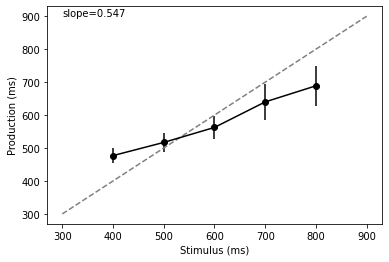

In [46]:
params = Params.from_dict({**PARAMS_DICT, 'ntrials': 100})
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
K = 5.0
initI = 0.8

exp_result = expsim.simulate(stimulus_lst, K, initI)

plot = BehavioralPlot(exp_result.create_behavioral_plot_data_experiment_simulation())
plot.plot_behavior()